In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [60]:
df=pd.read_csv("medical-charges.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
import plotly.express as ex
%matplotlib inline

In [5]:
sns.set_style('darkgrid')
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [10]:
fig=ex.histogram(df,x="age",marginal='box',)
fig.update_layout(bargap=.1)
fig.show()

In [6]:
fig=ex.histogram(df,x="bmi",marginal='box',)
fig.update_layout(bargap=.1)
fig.show()

In [7]:
fig=ex.histogram(df,x="charges",marginal='box',color="smoker")
fig.update_layout(bargap=.1)
fig.show()

In [8]:
df.groupby("sex")["smoker"].count()

sex
female    662
male      676
Name: smoker, dtype: int64

In [9]:
df[df["smoker"] == "yes"].groupby("sex")["smoker"].count()

sex
female    115
male      159
Name: smoker, dtype: int64

In [10]:
fig=ex.histogram(df,x="smoker",marginal='box',color="sex")
fig.update_layout(bargap=.1)
fig.show()

In [11]:
fig=ex.scatter(df,x="age",y="charges",color="smoker",opacity=.8)
fig.update_traces(marker_size=5)
fig.show()

In [12]:
df.shape

(1338, 7)

In [62]:
smoker_value={"yes":1,"no":0}
sex_numc={"male":1,"female":0}
df["smoker_numeric"]=df.smoker.map(smoker_value)
df["sex_numeric"]=df.sex.map(sex_numc)

In [63]:
sex_numc=df.sex.map(sex_numc)
sex_numc

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64

In [64]:
df.drop(columns=["sex","smoker"],inplace=True)

In [65]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [151]:
df_nonSmokers=df[df["smoker_numeric"]==0]


In [152]:
df_nonSmokers.drop(columns="smoker_numeric",inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2808\3481518699.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [153]:
fig=ex.scatter(x=df_nonSmokers["age"],y=df_nonSmokers["charges"])
fig.show()

<Axes: xlabel='region', ylabel='charges'>

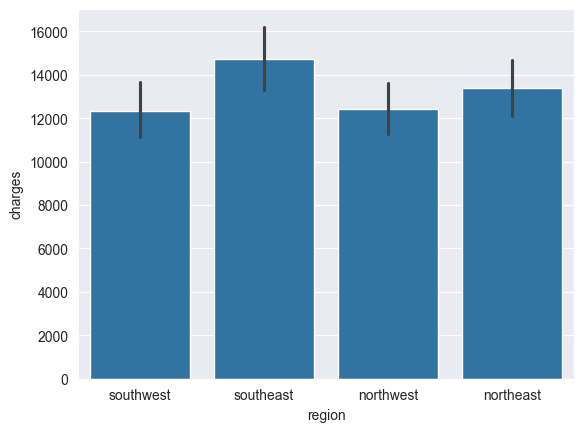

In [154]:
sns.barplot(data=df,x="region",y="charges")

In [155]:
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder()
one.fit(df_nonSmokers[["region"]])
one_hot=one.transform(df_nonSmokers[["region"]]).toarray()

In [156]:
df_nonSmokers[["northeast","northwest","southeast","southwest"]]=one_hot
df_nonSmokers.drop(columns="region",inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2808\2183744003.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_2808\2183744003.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_2808\2183744003.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [157]:
df_nonSmokers.head()


,age,bmi,children,charges,sex_numeric,northeast,northwest,southeast,southwest
1,18,33.770,1,1725.55230,1,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,1,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,1,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,1,0.0,1.0,0.0,0.0
5,31,25.740,0,3756.62160,0,0.0,0.0,1.0,0.0


In [158]:
targets=df_nonSmokers["charges"]
df_nonSmokers.drop(columns="charges",inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2808\3595765940.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [163]:
df_nonSmokers.head()

,age,bmi,children,sex_numeric,northeast,northwest,southeast,southwest
1,18,33.770,1,1,0.0,0.0,1.0,0.0
2,28,33.000,3,1,0.0,0.0,1.0,0.0
3,33,22.705,0,1,0.0,1.0,0.0,0.0
4,32,28.880,0,1,0.0,1.0,0.0,0.0
5,31,25.740,0,0,0.0,0.0,1.0,0.0


In [164]:
df_nonSmokers.shape

(1064, 8)

In [165]:
df_nonSmokers

,age,bmi,children,sex_numeric,northeast,northwest,southeast,southwest
1,18,33.770,1,1,0.0,0.0,1.0,0.0
2,28,33.000,3,1,0.0,0.0,1.0,0.0
3,33,22.705,0,1,0.0,1.0,0.0,0.0
4,32,28.880,0,1,0.0,1.0,0.0,0.0
5,31,25.740,0,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
1332,52,44.700,3,0,0.0,0.0,0.0,1.0
1333,50,30.970,3,1,0.0,1.0,0.0,0.0
1334,18,31.920,0,0,1.0,0.0,0.0,0.0
1335,18,36.850,0,0,0.0,0.0,1.0,0.0


In [166]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

numerical_cols = ["age", "bmi", "children", "sex_numeric", "northeast", "northwest", "southeast", "southwest"]

# Apply standardization and assign back to the DataFrame using .loc
df_nonSmokers[numerical_cols] = sc.fit_transform(df_nonSmokers[numerical_cols])
df_nonSmokers.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_2808\2893822330.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,bmi,children,sex_numeric,northeast,northwest,southeast,southwest
1,-1.519191,0.516236,-0.074103,1.028604,-0.564326,-0.578797,1.702186,-0.578797
2,-0.808802,0.388758,1.568521,1.028604,-0.564326,-0.578797,1.702186,-0.578797
3,-0.453608,-1.315636,-0.895416,1.028604,-0.564326,1.727721,-0.587480,-0.578797
4,-0.524646,-0.293330,-0.895416,1.028604,-0.564326,1.727721,-0.587480,-0.578797
5,-0.595685,-0.813175,-0.895416,-0.972191,-0.564326,-0.578797,1.702186,-0.578797


In [167]:
df_nonSmokers.fillna(df_nonSmokers["northeast"].mode()[0],inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2808\3189813244.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [168]:
df_nonSmokers.isna().sum()

age            0
bmi            0
children       0
sex_numeric    0
northeast      0
northwest      0
southeast      0
southwest      0
dtype: int64

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_nonSmokers, targets, test_size=0.3, random_state=42)


In [170]:
X_test.shape

(320, 8)

In [171]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [172]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

Train R2-score : 0.4
Test R2-score : 0.45
Train CV scores : [0.29097177 0.29485307 0.48073336 0.45567764 0.40691085]
Train CV mean : 0.39


C:\Users\HP\AppData\Local\Temp\ipykernel_2808\224628823.py:34: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




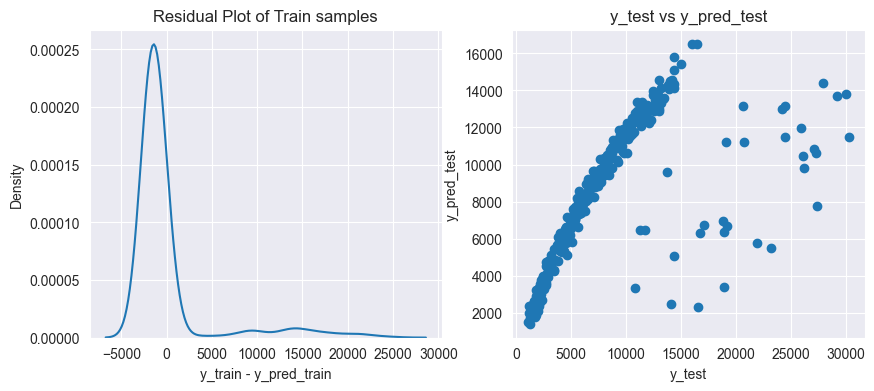

In [173]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"linear_regression")